<a href="https://colab.research.google.com/github/Reptilefury/coursera-machine-learning/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Tensorflow Deep learning framework
import tensorflow as tf
from tensorflow import keras 


#Data manipulation
import pandas 

#Calculation
import numpy as np


#Visualization
import matplotlib.pyplot as plt

#Paths
import pathlib
from pathlib import Path

#PIL for opening images
import PIL

In [2]:
print("Version", tf.__version__) #We are dealing with tensorflow 2

Version 2.8.0


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
#Check the size of the images downloaded 
image_count = len(list(data_dir.glob("*/*.jpg")))

In [5]:
image_count #A total of three thousand six hundred and seventy  images

3670

In [6]:
#Lets visualize a few of the images
roses = list(data_dir.glob("roses/*"))

In [7]:
first_image = PIL.Image.open(roses[0]) #We visualize the first image of the roses in the list

In [8]:
first_image.size

(180, 240)

In [9]:
batch_size = 64
image_height = 256
image_width = 256 

In [10]:
#We now load the data from the directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed =123, 
    batch_size = batch_size, 
    image_size = (image_width, image_height,)
) #Automatically loads and splits the dataset into the ration 80:20 
#80% for training and  20% for testing

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [11]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2, 
    subset = "validation",
    seed = 123,
    batch_size = batch_size,
    image_size =(image_width, image_height)
) #Sets a side 20% of the data to be utilized for validation

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [12]:
#Normalize the dataset
normalize_layer = tf.keras.layers.Rescaling(1./255)

In [13]:
normalized_data = train_dataset.map(lambda x,y: (normalize_layer(x),y)) #Turns data to be floating point numbers in between zero and one

In [14]:
#We can check the maximum value in our dataset to see  whether they are floating point numbers in between zero and one
for image_batch, labels_batch in normalized_data:
  print(np.max(image_batch[0])) #Maximum value in an individual normalized image data
  print(np.min(image_batch[0])) #Minimum value in an individual normalized image data 
  break

1.0
0.0


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers 

In [16]:
num_channels = 3
image_size = (image_width,image_height, num_channels)

In [81]:
num_class = 5

In [ ]:
c

In [18]:
num_class #5 classes in total

5

In [19]:
for image_batch, labels_batch in train_dataset:
  print(image_batch[0].shape)
  print(labels_batch.shape)
  break

(256, 256, 3)
(64,)


In [20]:
#We can now build our computational graph using the Sequential model and functional api  


model = Sequential()
normalization_layer = model.add(layers.Rescaling(1.255,input_shape=image_size))
fistConv = model.add(layers.Conv2D(16,(3,3)))
firstMaxPool = model.add(layers.MaxPooling2D((2,2)))

#Second ConvBlock 
secondConvBlock = model.add(layers.Conv2D(32,(3,3),activation='relu'))
secondMaxPooling = model.add(layers.MaxPooling2D((2,2)))

#ThirdConvBlock 
thirdConv = model.add(layers.Conv2D(64,(3,3), activation="relu"))
thirdMaxPooling = model.add(layers.MaxPooling2D((2,2)))

#Fourth ConvBlock
fourth = model.add(layers.Conv2D(128,(3,3), activation = "relu"))
fourthMaxPooling = model.add(layers.MaxPooling2D((2,2)))


#Flatten the learned features
flatten = model.add(layers.Flatten())#turns the learned features from a 2D array (matrix) into a  vector  
#Zero mean and center
batch_norm = model.add(layers.BatchNormalization()) #Reduced vanishing and exploding gradients and speeds up training  
#First dense layer
dense_300 = model.add(layers.Dense(300,kernel_initializer="he_normal")) #Dense layer of 300 neurons and a weight initialization strategy
#First activation function 
activation_func1 = model.add(layers.Activation('elu')) #Applied non-linearity to our model
#Dense layer of 100 neurons
dense_100  = model.add(layers.Dense(100,kernel_initializer="he_normal"))
activation_func2 = model.add(layers.Activation('elu'))
#Second BatchNorm
batch_norm2 = model.add(layers.BatchNormalization())
#Outputlayer 
output_layer = model.add(layers.Dense(num_class,activation="softmax"))

In [21]:
#Compile our model i.e define the hyperparameters. Parameters of the learning algorithm 
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="Adam",metrics=['Accuracy'])

In [22]:
#Check the summary of our model before traing
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [23]:
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal",input_shape=(image_height, image_width,3)),
 tf.keras.layers.RandomRotation(0.1),
 tf.keras.layers.RandomZoom(0.1)
])

In [54]:
#New model
modelOne = tf.keras.models.Sequential([
data_augmentation,
tf.keras.layers.Rescaling(1./255, input_shape=image_size),
tf.keras.layers.Conv2D(16,(3,3), activation = 'relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(300,kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
tf.keras.layers.Activation('elu'),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(num_class,activation='softmax')
])

In [55]:
modelOne.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='Adam',metrics =['Accuracy'])

In [ ]:
tf.keras.utils.plot_model(model)

In [53]:
#Define the checkpoint and callback function to save the model every 5 seconds and inform us when validation loss has improved
check_point = "classify_model/-cp{epoch:04d}.ckpt"
call_back = tf.keras.callbacks.ModelCheckpoint(check_point,verbose=1,save_freq=5 * batch_size, save_best_only=True)
model.save_weights(check_point.format(epoch=0))

In [28]:
#Pass the dataset into memory for easier loading after the first epoch
AUTOTUNE = tf.data.AUTOTUNE
#train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [29]:
#Pass the validation dataset into memory
#validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [30]:
#train_dataset = train_dataset.as_numpy_iterator()

In [31]:
#validation_dataset = validation_dataset.as_numpy_iterator()

In [32]:
#Train the model 
history = model.fit(train_dataset, batch_size=batch_size, epochs= 20,verbose =1,validation_data=[validation_dataset], callbacks=call_back)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


46/46 [==============================] - 23s 183ms/step - loss: 1.2761 - Accuracy: 0.5252 - val_loss: 6.5539 - val_Accuracy: 0.2493
Epoch 2/20
46/46 [==============================] - 8s 158ms/step - loss: 0.8186 - Accuracy: 0.6948 - val_loss: 1.2041 - val_Accuracy: 0.5518
Epoch 3/20
46/46 [==============================] - 8s 157ms/step - loss: 0.6413 - Accuracy: 0.7708 - val_loss: 1.4545 - val_Accuracy: 0.5095
Epoch 4/20
46/46 [==============================] - 8s 159ms/step - loss: 0.4120 - Accuracy: 0.8651 - val_loss: 1.6067 - val_Accuracy: 0.4605
Epoch 5/20
46/46 [==============================] - 8s 161ms/step - loss: 0.2600 - Accuracy: 0.9213 - val_loss: 1.0662 - val_Accuracy: 0.6322
Epoch 6/20
46/46 [==============================] - 8s 158ms/step - loss: 0.1487 - Accuracy: 0.9605 - val_loss: 1.5056 - val_Accuracy: 0.5913
Epoch 7/20
43/46 [===========================>..] - ETA: 0s - loss: 0.1055 - Accuracy: 0.9735
Epoch 7: saving model to classify_model/-cp0007.ckpt
46/46 [====

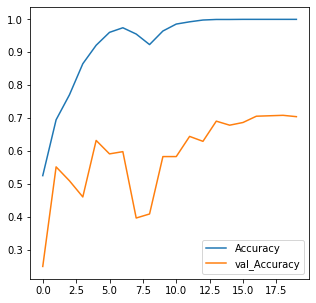

In [33]:
#Plot the perfomance of the model 
plt.figure(figsize=(5,5))
plt.plot(history.history['Accuracy'], label= 'Accuracy')
plt.plot(history.history['val_Accuracy'], label = 'val_Accuracy')
plt.legend(loc="lower right")

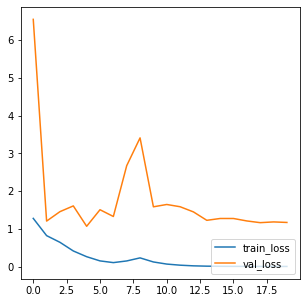

In [34]:
#Plot the loss 
plt.figure(figsize=(5,5))
plt.plot(history.history['loss'], label ='train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc= "lower right")

Data Augmentation with keras sequential api: Data Augmentation is recreating new data examples from existing training examples

In [35]:
dataAugmentation = tf.keras.Sequential([
#tf.keras.layers.Flatten(),
tf.keras.layers.RandomFlip("horizontal",input_shape=(256,256,3)),
tf.keras.layers.RandomRotation(0.1),
tf.keras.layers.RandomZoom(0.1)
])

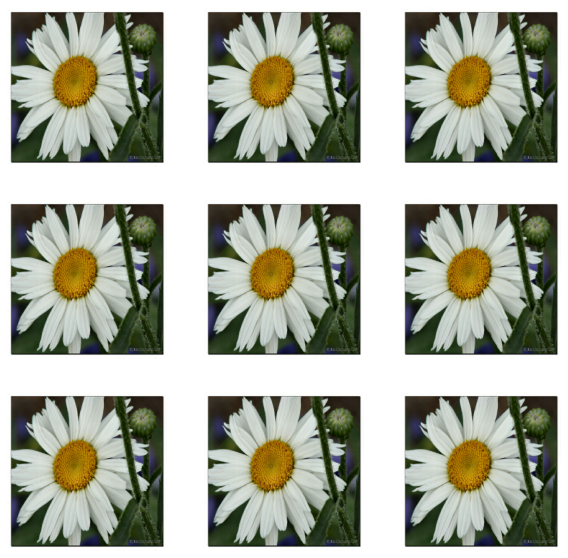

In [36]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = dataAugmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [37]:
data_augmentation = tf.keras.Sequential([
 tf.keras.layers.RandomFlip("horizontal",input_shape=(image_height, image_width,3)),
 tf.keras.layers.RandomRotation(0.1),
 tf.keras.layers.RandomZoom(0.1)
])

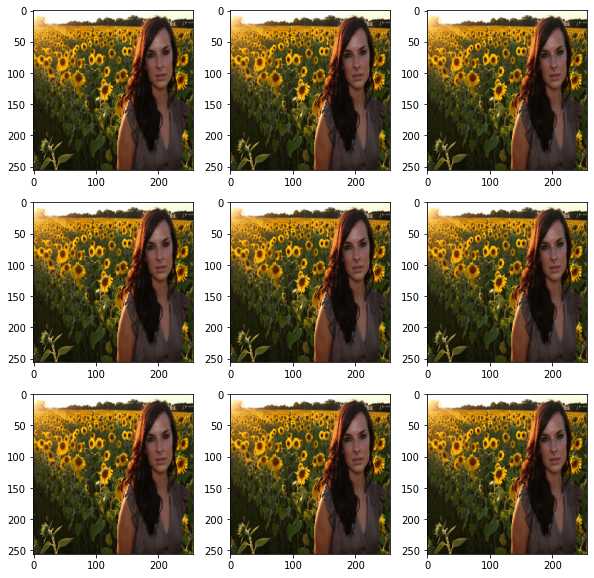

In [38]:
#Visualize the augmented images 
figure = plt.figure(figsize=(10,10))
for images,_ in train_dataset.take(1):
  for i in range(9):
    figure.add_subplot(3,3, i + 1)
    augmented_images = data_augmentation(images)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))

Applying dropout regularization(constraining our model to make it simple) which kills neurons i.e sets some neurons activations to  zero.

In [39]:
#Lets create a model with drop out regularization
model = tf.keras.models.Sequential([
data_augmentation,
tf.keras.layers.Rescaling(1./255, input_shape=(256,256,3)),
tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
tf.keras.layers.MaxPooling2D((2,2)),
tf.keras.layers.Conv2D(32,(3,3), activation ='relu'),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
tf.keras.layers.MaxPool2D((2,2)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(num_class,activation="softmax") 
])

In [40]:
#Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer ="Adam",metrics=['Accuracy'])

In [41]:
AUTOTUNE  = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [42]:
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [57]:
History = modelOne.fit(train_dataset,batch_size=batch_size, epochs = 15, validation_data=[validation_dataset], callbacks=[call_back], verbose =1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


46/46 [==============================] - 6s 97ms/step - loss: 1.4218 - Accuracy: 0.4445 - val_loss: 1.6628 - val_Accuracy: 0.2371
Epoch 2/15
46/46 [==============================] - 4s 93ms/step - loss: 1.1991 - Accuracy: 0.5167 - val_loss: 1.8001 - val_Accuracy: 0.2684
Epoch 3/15
46/46 [==============================] - 4s 93ms/step - loss: 1.0574 - Accuracy: 0.5967 - val_loss: 1.8978 - val_Accuracy: 0.2139
Epoch 4/15
46/46 [==============================] - 4s 96ms/step - loss: 0.9897 - Accuracy: 0.6158 - val_loss: 1.6717 - val_Accuracy: 0.2507
Epoch 5/15
46/46 [==============================] - 4s 93ms/step - loss: 0.9090 - Accuracy: 0.6478 - val_loss: 1.4904 - val_Accuracy: 0.3760
Epoch 6/15
46/46 [==============================] - 4s 93ms/step - loss: 0.8514 - Accuracy: 0.6781 - val_loss: 1.4435 - val_Accuracy: 0.3529
Epoch 7/15
46/46 [==============================] - 4s 93ms/step - loss: 0.8063 - Accuracy: 0.6890 - val_loss: 1.2255 - val_Accuracy: 0.4741
Epoch 8/15
46/46 [======

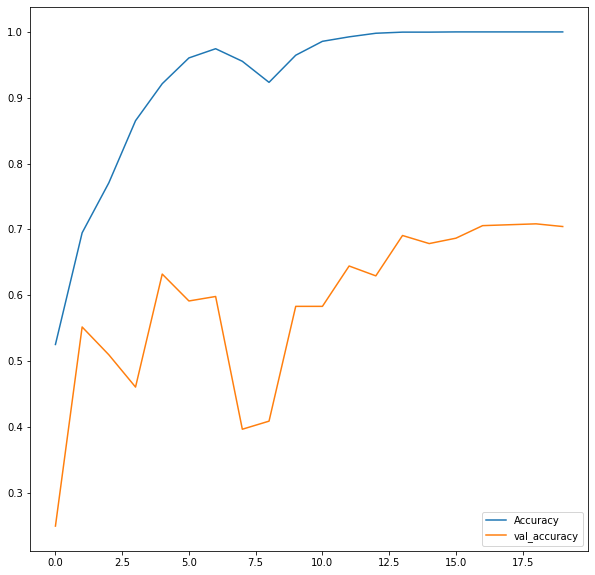

In [56]:
#Visualize and make new predictions
plt.figure(figsize=(10,10))
plt.plot(history.history['Accuracy'],label="Accuracy")
plt.plot(history.history['val_Accuracy'], label = 'val_accuracy')
plt.legend(loc = "lower right")

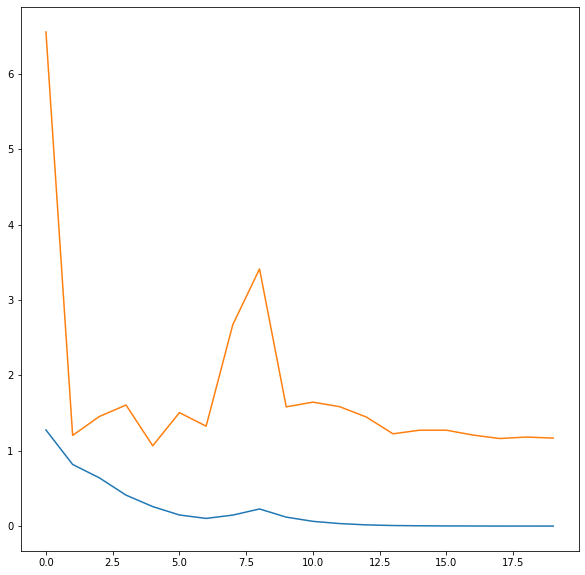

In [59]:
#Plot the loss 
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')

In [61]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower = tf.keras.utils.get_file('red sunflower', origin = sunflower_url)

131072/117948 [=================================] - 0s 0us/step


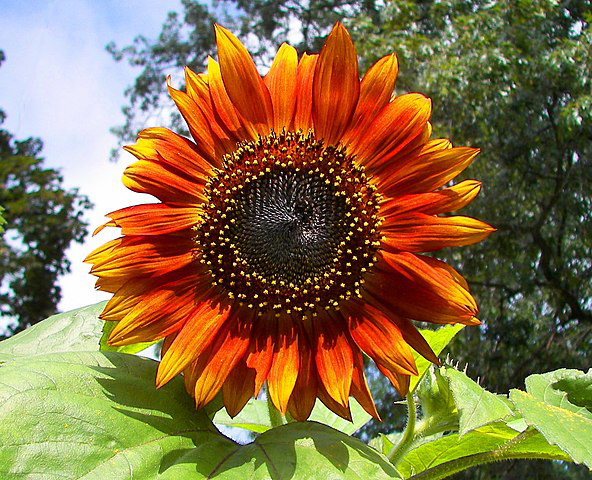

In [62]:
PIL.Image.open(sunflower)

In [96]:
sunflowerTwo = Path("/content/Sunflower.jpeg")

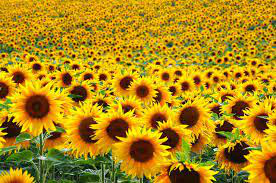

In [97]:
PIL.Image.open(sunflowerTwo)

In [99]:
sunflowerImage = tf.keras.utils.load_img(sunflowerTwo, target_size=(image_height, image_width, num_channels))

In [101]:
#Turn the image to an array 
sunflower_array = tf.keras.utils.img_to_array(sunflowerImage)
sunTwo = tf.expand_dims(sunflower_array,0)

In [102]:
pred = model.predict(sunTwo)

In [104]:
pred #Output vector of our model from the five classes 

array([[0.23528093, 0.11013759, 0.20936744, 0.30190855, 0.14330553]],
      dtype=float32)

In [106]:
#Pass the out output to a softmax  to exponentiate each element in the vector sum up all the values then divide each element by the sum of all the exponents then all the elements in our probabilty distribution must sum up to one
score = tf.nn.softmax(pred)

In [108]:
score #This is our probability  distribution that sums up to 1 when all elements are added up

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.2067049 , 0.1823903 , 0.20141725, 0.22094633, 0.18854123]],
      dtype=float32)>

In [111]:
#Lets get the prediction  
arg = np.argmax(score) #3 is the index of the maximum value in our probability distribution

In [110]:
np.max(score) #This returns the value of the index in our probability distribution

0.22094633

In [113]:
print("The prediction is: {} with a confidence of {:.2f} percent".format(class_names[arg], 100 * np.max(score)))

The prediction is: sunflowers with a confidence of 22.09 percent


In [63]:
#Loading using keras utility 
image = tf.keras.utils.load_img(
    sunflower,  target_size = (image_height, image_width, num_channels)
)

In [68]:
image_array = tf.keras.utils.img_to_array(image)
image_array = tf.expand_dims(image_array,0)

In [73]:
predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

In [79]:
num_class

5

In [87]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [88]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.19909316, 0.18434274, 0.20208135, 0.22011077, 0.19437195],
      dtype=float32)>

In [89]:
np.max(score)

0.22011077

In [86]:
np.argmax(score)

3

In [94]:
print("This is image most likely belongs to {} with a  {:.2f} percent confidence".format(class_names[np.argmax(score)],np.max(score) * 100))

This is image most likely belongs to sunflowers with a  22.01 percent confidence


In [114]:
tulips = Path("/content/tulips.jpeg")

In [115]:
#load Image with keras utility
tulips_url = "https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn11.bigcommerce.com%2Fs-1b9100svju%2Fproduct_images%2Fuploaded_images%2Fallabouttulips1.jpg&imgrefurl=https%3A%2F%2Fwww.longfield-gardens.com%2Farticle%2FAll-About-Tulips&tbnid=_Bnev0Bd07ewTM&vet=12ahUKEwiYhvfC3Pr3AhWpRPEDHbvUDggQMygKegUIARCAAg..i&docid=fgO-Asc8rtyo4M&w=1500&h=1000&q=tulips&ved=2ahUKEwiYhvfC3Pr3AhWpRPEDHbvUDggQMygKegUIARCAAg"

In [118]:
tulip_dir = tf.keras.utils.get_file('tulip',origin=tulips_url)

In [128]:
tulip_image = tf.keras.utils.load_img(tulips, target_size=(image_height,image_width,num_channels))

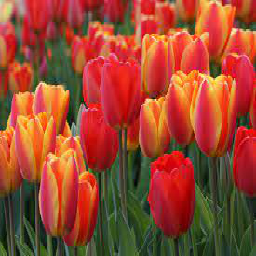

In [129]:
tulip_image

In [130]:
#Turn the image into an array 
tulip_array = tf.keras.utils.img_to_array(tulip_image)

In [131]:
tulip_image = tf.expand_dims(tulip_array,0)

In [132]:
#Make our prediction
prediction = model.predict(tulip_image)

In [133]:
#Get predictions or output vector from our model
prediction 

array([[0.20174976, 0.14380397, 0.21756831, 0.27017835, 0.16669962]],
      dtype=float32)

In [137]:
pred = np.argmax([prediction]) #Predicted class

In [138]:
conf = np.max(prediction) #This is the confidence of our model in terms of percentage 

In [142]:
print("Prediction {} confidence: {:.2f}%".format(class_names[pred], 100 * conf)) #false predictions

Prediction sunflowers confidence: 27.02%


In [ ]:
#Turn the image into an  array 
tulip_arry = tf.keras.utils.img_to_array(tulip_dir)